In [ ]:
from google.colab import files
file=files.upload()

Saving heart_failure_clinical_records.csv to heart_failure_clinical_records.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv("heart_failure_clinical_records.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data['age'] = data['age'].astype(int)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


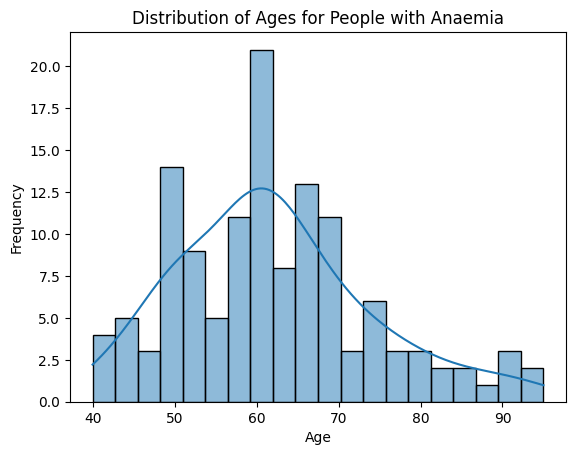

In [ ]:
#1)In which age of people has anaemia,
anaemia_data = data[data['anaemia'] == 1]
sns.histplot(anaemia_data['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages for People with Anaemia')
plt.show()



In [ ]:
#How many patients in the dataset have diabetes and anamia
patients=data[(data['diabetes']==1) & (data['anaemia']==1) ].value_counts().sum()
patients

53

<Axes: xlabel='diabetes', ylabel='count'>

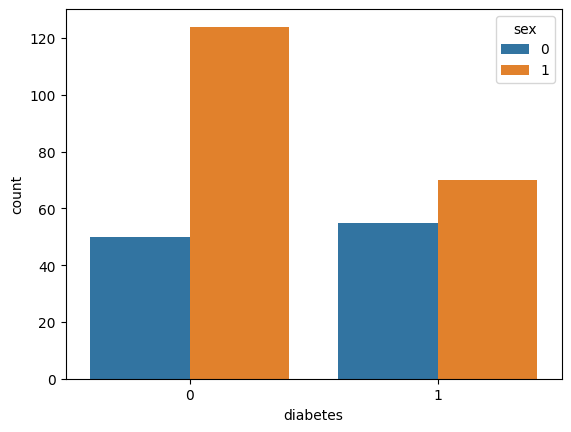

In [ ]:
#2)create a countplot to visualize the distribution of patients with and without diabetes
sns.countplot(x='diabetes',data=data,hue='sex')

37.871134020618555 38.476190476190474


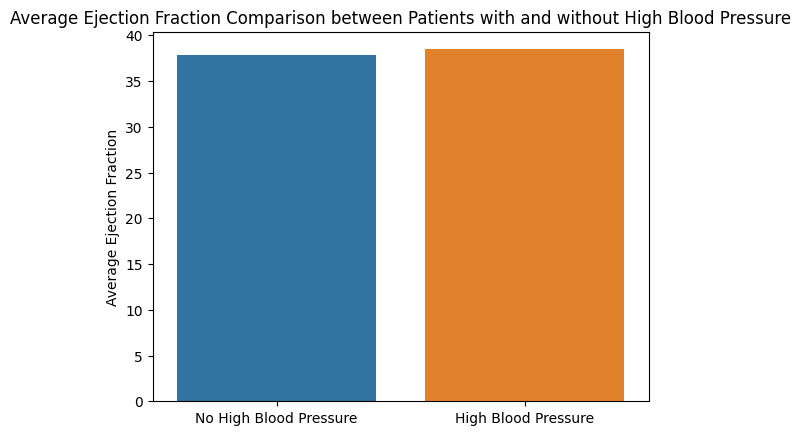

In [ ]:
#3)average ejection fraction between high_blood_pressure  and no high_blood_pressure patients.
no_high_blood=data[data['high_blood_pressure']==0]['ejection_fraction'].mean()
yes_high_blood=data[data['high_blood_pressure']==1]['ejection_fraction'].mean()
print(no_high_blood,yes_high_blood)
sns.barplot(x=['No High Blood Pressure', 'High Blood Pressure'], y=[no_high_blood, yes_high_blood])
plt.ylabel('Average Ejection Fraction')
plt.title('Average Ejection Fraction Comparison between Patients with and without High Blood Pressure')
plt.show()

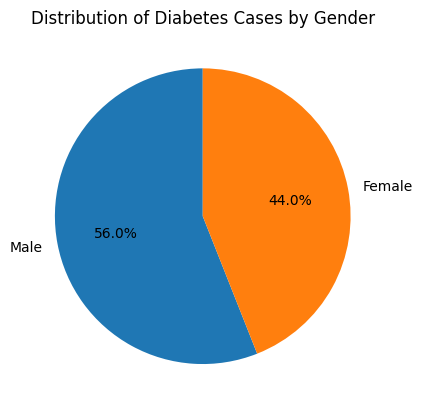

In [ ]:
#4)In which gender has found highest dibetes level
gender_1=data[(data['sex']==1) & data['diabetes']==1].value_counts().sum()
gender_0=data[(data['sex']==0) & data['diabetes']==1].value_counts().sum()
sizes=[gender_1,gender_0]
label=['Male','Female']
plt.pie(sizes,labels=label,autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Diabetes Cases by Gender')
plt.show()

In [ ]:
#5)Because of smoking people can dead
#which is reason behind of pepople death

smoking_count = data[(data['DEATH_EVENT'] == 1) & (data['smoking'] == 1)].shape[0]
without_smoking_count = data[(data['DEATH_EVENT'] == 1) & (data['smoking'] == 0)].shape[0]
print("Death events with smoking:", smoking_count)
print("Death events without smoking:", without_smoking_count)


Death events with smoking: 30
Death events without smoking: 66


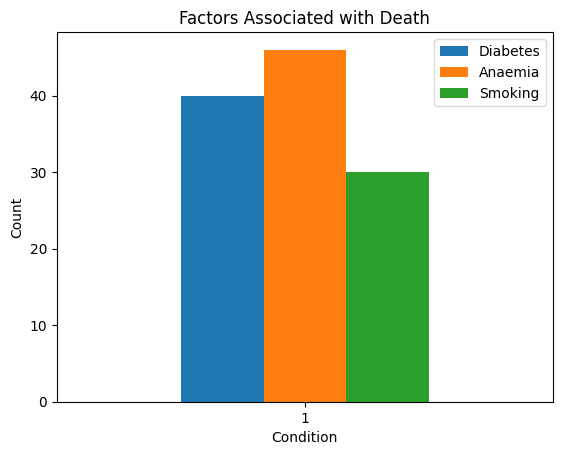

In [ ]:
#5)analyze the impact of diabetes, anaemia, and smoking on the death events
death_reasons = data[(data['DEATH_EVENT'] == 1) & (data['diabetes'] == 1)]
death_reasonss = data[(data['DEATH_EVENT'] == 1) & (data['anaemia'] == 1)]
death_reasonsss = data[(data['DEATH_EVENT'] == 1) & (data['smoking'] == 1)]
diabetes_counts = death_reasons['diabetes'].value_counts()
anaemia_counts = death_reasonss['anaemia'].value_counts()
smoking_counts = death_reasonsss['smoking'].value_counts()
counts_df = pd.DataFrame({
    'Diabetes': diabetes_counts,
    'Anaemia': anaemia_counts,
    'Smoking': smoking_counts
})

# Plot grouped bar plot
counts_df.plot(kind='bar', rot=0)
plt.title('Factors Associated with Death')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()



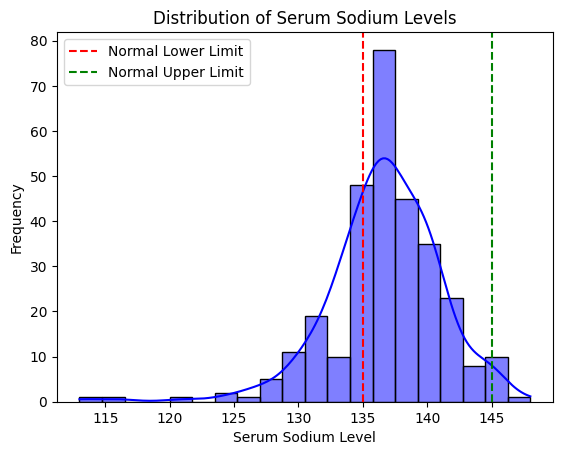

In [ ]:
#6)How many people have the normal sodium level
normal_sodium_count = data[(data['serum_sodium'] >= 135) & (data['serum_sodium'] <= 145)].shape[0]
sns.histplot(data['serum_sodium'], bins=20, kde=True, color='blue')
plt.xlabel('Serum Sodium Level')
plt.ylabel('Frequency')
plt.title('Distribution of Serum Sodium Levels')
plt.axvline(x=135, color='red', linestyle='--', label='Normal Lower Limit')
plt.axvline(x=145, color='green', linestyle='--', label='Normal Upper Limit')
plt.legend()
plt.show()


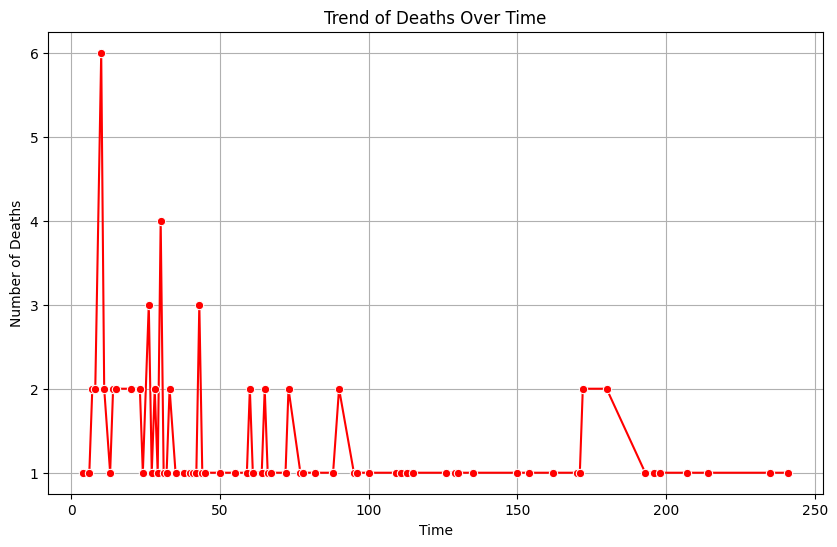

In [ ]:
#7)To visualize the trend of deaths over time using a line plot
death_trend = data[data['DEATH_EVENT'] == 1].groupby('time').size().reset_index(name='Death Count')

plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='Death Count', data=death_trend, marker='o', color='red')
plt.xlabel('Time')
plt.ylabel('Number of Deaths')
plt.title('Trend of Deaths Over Time')
plt.grid(True)
plt.show()

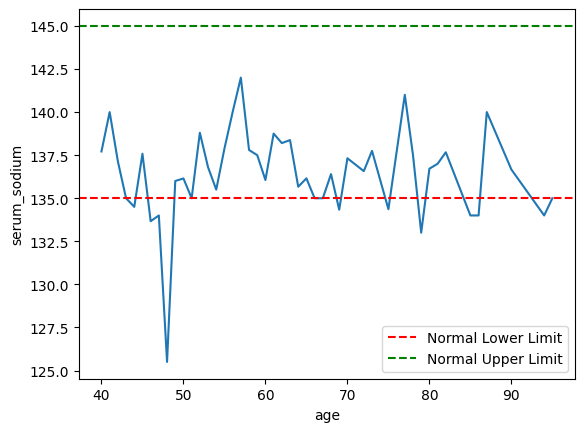

In [ ]:
#8)age wise avg of sodium in people
asa=data.groupby('age')['serum_sodium'].mean().reset_index()
asa
sns.lineplot(x=asa['age'],y=asa['serum_sodium'])
plt.axhline(y=135, color='red', linestyle='--', label='Normal Lower Limit')
plt.axhline(y=145, color='green', linestyle='--', label='Normal Upper Limit')
plt.legend()
plt.show()

Platelet Count Range: (25100.0, 850000.0)


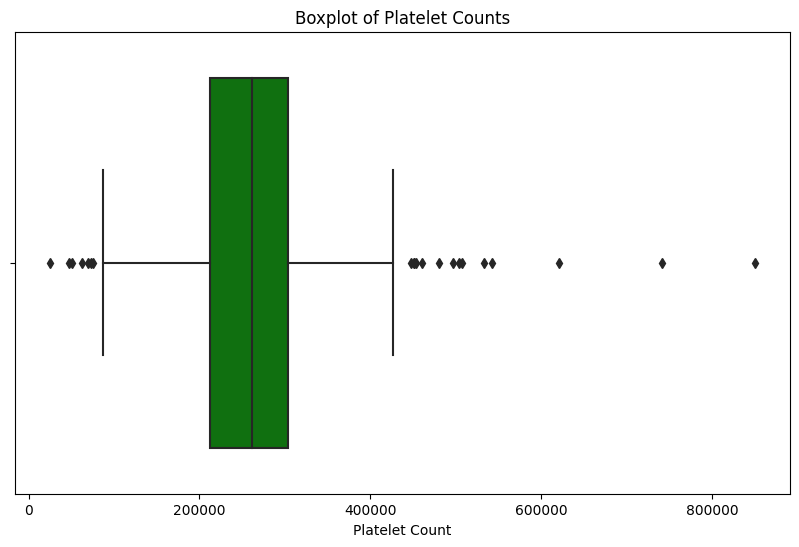

In [ ]:
#9)To visualize the distribution of platelet counts
platelet_range = (data['platelets'].min(), data['platelets'].max())
print("Platelet Count Range:", platelet_range)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['platelets'], color='green')
plt.title('Boxplot of Platelet Counts')
plt.xlabel('Platelet Count')
plt.show()


In [ ]:
#conclusion
#-People around the age of 60 have the highest levels of anemia.
#-There is a noticeable difference in diabetes levels between genders, with females having a lower prevalence of diabetes compared to males.
#-The majority of people in the dataset have normal sodium levels, falling within the range of 135 to 145
#-Anemia is mentioned as a potential cause of death in the dataset